In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn import linear_model, datasets
import random
import numpy as np
from scipy import interpolate
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
# Read in data from CSV
dfData = pd.read_csv('../data/Wednesday-workingHours-withoutInfinity-Sampled.pcap_ISCX.csv')

print(dfData.groupby(' Label').size())

 Label
0    5000
1    5500
2    5500
3    5499
4    5796
dtype: int64


In [3]:
# change dfData column order
column = list(dfData.columns.values)
column.remove(' Destination IP')
column.remove(' Timestamp')
column.insert(2, ' Destination IP')
column.insert(3, ' Timestamp')

dfData = dfData[column]

In [4]:
# Encode the classification labels to numbers
# Get classes and one hot encoded feature vectors
le = LabelEncoder()
le.fit(dfData[' Label'])
allClasses = le.transform(dfData[' Label'])
allFeatures_full = dfData.drop([' Label'], axis=1)

# omit the first 4 features
allFeatures = allFeatures_full.iloc[:,4:]

In [5]:
# normalize
from sklearn.preprocessing import normalize

allFeatures = pd.DataFrame(normalize(allFeatures, axis=1, copy=True, return_norm=False), columns=column[4:-1])

In [6]:
# Form training, test, and validation sets
X_trainAndTest, X_validation, y_trainAndTest, y_validation = train_test_split(allFeatures, allClasses, test_size=0.20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_trainAndTest, y_trainAndTest, test_size=0.20, random_state=42)

In [7]:
# import numpy as np
np.shape(allFeatures)

(27295, 80)

In [8]:
chosen = [' Source Port', ' Destination Port', ' Flow Duration', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', 'Bwd Packet Length Max', ' Bwd Packet Length Min', 'Flow Bytes/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Fwd Header Length', ' Bwd Packets/s', ' Packet Length Mean', ' ACK Flag Count', ' Down/Up Ratio', ' Avg Fwd Segment Size', ' Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Bwd Avg Bytes/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', ' Subflow Fwd Bytes', 'Init_Win_bytes_forward', ' act_data_pkt_fwd', ' Active Std', ' Active Min', ' Idle Max']


In [9]:
df_selected = allFeatures[chosen]

In [ ]:
##SVM for PCA evaluation

In [18]:
k = [index for index in range(80,0,-1)]

from collections import defaultdict
test_acc = defaultdict(list)
train_acc = defaultdict(list)
val_acc = defaultdict(list)

In [19]:
from sklearn.feature_selection import RFE
from sklearn import decomposition
from sklearn import metrics

for item in k:
    
    print("# of features selected: ", item)
    pca = decomposition.PCA(n_components=item)
    pca.fit(allFeatures)
    pca_features = pca.transform(allFeatures)
    
    # Form training, test, and validation sets
    X_pca_trainAndTest, X_pca_validation, y_pca_trainAndTest, y_pca_validation = train_test_split(pca_features, allClasses, test_size=0.20, random_state=42)
    X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca_trainAndTest, y_pca_trainAndTest, test_size=0.20, random_state=42)
    
    clf = svm.SVC()
    clf.fit(X_pca_train, y_pca_train)

    train_acc[item].append(metrics.accuracy_score(y_pca_train, clf.predict(X_pca_train))) 
    test_acc[item].append(metrics.accuracy_score(y_pca_test, clf.predict(X_pca_test))) 
    val_acc[item].append(metrics.accuracy_score(y_pca_validation, clf.predict(X_pca_validation)))
#     print("these features are:")
#     names_features = rfe.get_support(True)
#     for item in (names_features):
#         print(column[item])

# acc = 
    
    print("________________________________________")
    

# of features selected:  80
________________________________________
# of features selected:  79
________________________________________
# of features selected:  78
________________________________________
# of features selected:  77
________________________________________
# of features selected:  76
________________________________________
# of features selected:  75
________________________________________
# of features selected:  74
________________________________________
# of features selected:  73
________________________________________
# of features selected:  72
________________________________________
# of features selected:  71
________________________________________
# of features selected:  70
________________________________________
# of features selected:  69
________________________________________
# of features selected:  68
________________________________________
# of features selected:  67
________________________________________
# of features selected:  66
______

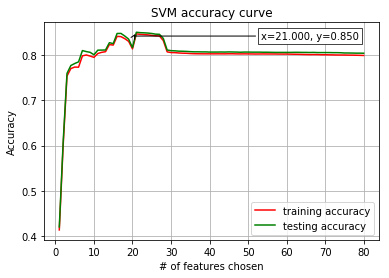

In [30]:
import matplotlib.pyplot as plt

g = plt.figure(0)
plt.plot(list(train_acc.keys()), list(train_acc.values()), color='r', label='training accuracy')
plt.plot(list(val_acc.keys()), list(val_acc.values()), color='g', label='testing accuracy')

def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

annot_max(np.asanyarray(list(val_acc.keys())),np.asanyarray(list(val_acc.values())))

plt.legend()
plt.title('SVM accuracy curve')
plt.xlabel('# of features chosen')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [21]:
# max_val_value = max(val_acc.values())
# max_val_keys = [k for k, v in val_acc.items() if v == max_val_value] # getting all keys containing the `maximum`
# print("MAX Validation Acc: ")
# print(max_val_value, max_val_keys)

MAX Validation Acc: 
[0.8501557061732918] [21]
